In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

In [2]:
# Specify the path to your CSV file
file_path = r'C:\Users\manda\Documents\Master thesis Data\Wollong QC work\Wollong Data QC 1indcal.csv'


# Try different encodings until you find the right one
encodings = ['utf-8', 'latin1', 'utf-16']

for encoding in encodings:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding=encoding)
        # Display the DataFrame
        print(df)
        break
    except UnicodeDecodeError:
        print(f"Failed to decode using encoding: {encoding}")

# Display the DataFrame
print(df)

       year  month  day  prcp  tmax  tmin
0      1893      1    1  16.0  21.0  16.0
1      1893      1    2  17.3  21.0  15.0
2      1893      1    3   2.3  19.0  12.0
3      1893      1    4   0.0  20.0  13.0
4      1893      1    5   0.8  21.0  15.0
...     ...    ...  ...   ...   ...   ...
13143  1928     12   27 -99.9  30.0  10.0
13144  1928     12   28 -99.9  35.0  13.0
13145  1928     12   29   3.0  38.0  16.0
13146  1928     12   30   8.6  25.0  19.0
13147  1928     12   31 -99.9  26.0  16.0

[13148 rows x 6 columns]
       year  month  day  prcp  tmax  tmin
0      1893      1    1  16.0  21.0  16.0
1      1893      1    2  17.3  21.0  15.0
2      1893      1    3   2.3  19.0  12.0
3      1893      1    4   0.0  20.0  13.0
4      1893      1    5   0.8  21.0  15.0
...     ...    ...  ...   ...   ...   ...
13143  1928     12   27 -99.9  30.0  10.0
13144  1928     12   28 -99.9  35.0  13.0
13145  1928     12   29   3.0  38.0  16.0
13146  1928     12   30   8.6  25.0  19.0
13147  1

In [3]:
# Count missing values in each column marked as -99.9
missing_values_count = (df == -99.9).sum()

# Display the result
print("Number of missing values (-99.9) in each column:")
print(missing_values_count)


Number of missing values (-99.9) in each column:
year        0
month       0
day         0
prcp     6382
tmax      176
tmin      166
dtype: int64


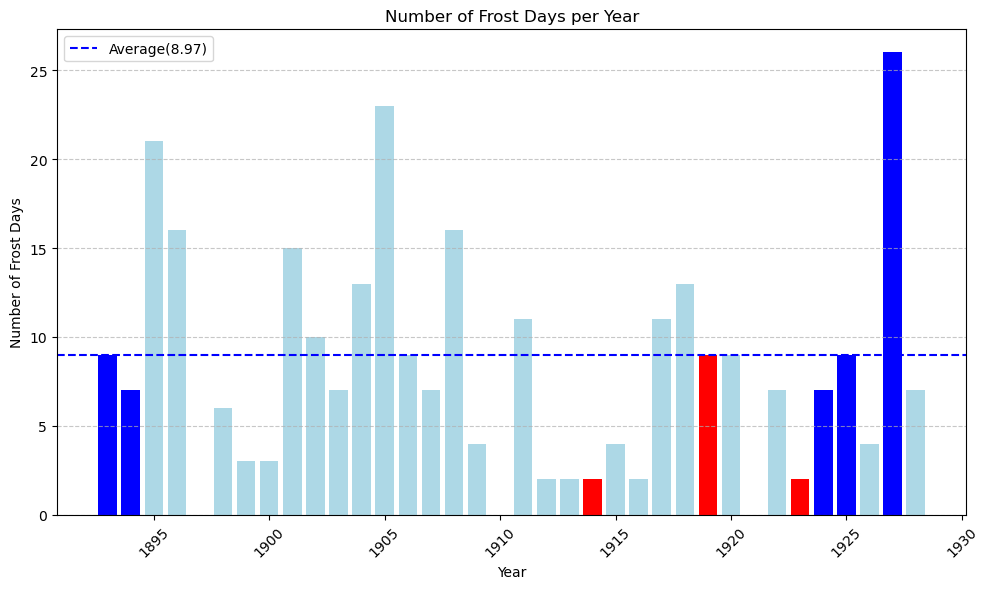

Linear Regression Results for Frost Days:
Slope Estimate: -0.07806330779873787
Slope Error: 0.10411817884530686
R-squared Value: 0.01781042970366213
P-value: 0.45905375774285984


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Filter out missing values (-99.9)
df_filtered = df[df['tmin'] != -99.9]

# Filter for days where minimum temperature is less than 0°C
frost_days = df_filtered[df_filtered['tmin'] < 0]

# Count the number of frost days for each year
frost_days_count = frost_days.groupby('year').size()

# Calculate the average value
average_value_frost = frost_days_count.mean()

Hot_Years = [1897,1914,1919,1923]
Cold_Years = [1893,1894,1924,1925,1927]

# Plotting
plt.figure(figsize=(10, 6))
bar_colors = ['lightblue' if year not in Hot_Years and year not in Cold_Years else 'red' if year in Hot_Years else 'blue' for year in frost_days_count.index]
plt.bar(frost_days_count.index, frost_days_count.values, color=bar_colors)

plt.axhline(y=average_value_frost, color='blue', linestyle='--', label=f'Average({average_value_frost:.2f})')
plt.title('Number of Frost Days per Year')
plt.xlabel('Year')
plt.ylabel('Number of Frost Days')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate linear regression
x_frost = frost_days_count.index.values
y_frost = frost_days_count.values
slope_frost, intercept_frost, r_value_frost, p_value_frost, std_err_frost = stats.linregress(x_frost, y_frost)

# Calculate R-squared value
r_squared_frost = r_value_frost ** 2

print("Linear Regression Results for Frost Days:")
print(f"Slope Estimate: {slope_frost}")
print(f"Slope Error: {std_err_frost}")
print(f"R-squared Value: {r_squared_frost}")
print(f"P-value: {p_value_frost}")


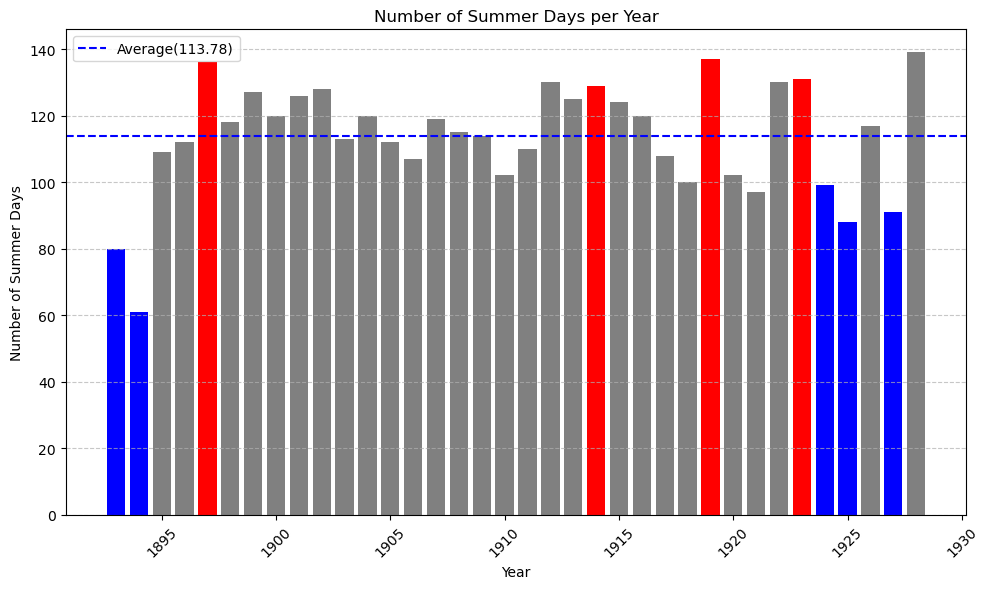

Linear Regression Results for Summer Days:
Slope Estimate: 0.16499356499356496
Slope Error: 0.27166461048127466
R-squared Value: 0.010732544159839843
P-value: 0.5476584970416276


In [5]:
import numpy as np
import scipy.stats as stats

# Remove rows with -99.9 values
filtered_df = df[df['tmax'] != -99.9]


# Filter for days where maximum temperature is greater than 25°C
summer_days = filtered_df[filtered_df['tmax'] > 25]

# Count the number of summer days for each year
summer_days_count = summer_days.groupby('year').size()

# Calculate the average value
average_value_summer = summer_days_count.mean()

Hot_Years = [1897,1914,1919,1923]
Cold_Years = [1893,1894,1924,1925,1927]

# Plotting
plt.figure(figsize=(10, 6))

bar_colors = ['Grey' if year not in Hot_Years and year not in Cold_Years else 'red' if year in Hot_Years else 'blue' for year in summer_days_count.index]
plt.bar(summer_days_count.index, summer_days_count.values, color=bar_colors)
plt.axhline(y=average_value_summer, color='blue', linestyle='--', label=f'Average({average_value_summer:.2f})')
plt.title('Number of Summer Days per Year')
plt.xlabel('Year')
plt.ylabel('Number of Summer Days')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate linear regression
x_summer = summer_days_count.index.values
y_summer = summer_days_count.values
slope_summer, intercept_summer, r_value_summer, p_value_summer, std_err_summer = stats.linregress(x_summer, y_summer)

# Calculate R-squared value
r_squared_summer = r_value_summer ** 2

print("Linear Regression Results for Summer Days:")
print(f"Slope Estimate: {slope_summer}")
print(f"Slope Error: {std_err_summer}")
print(f"R-squared Value: {r_squared_summer}")
print(f"P-value: {p_value_summer}")

       year  month  day  prcp  tmax  tmin
12821  1928      2    9   0.0 -18.0 -99.9
13095  1928     11    9 -99.9 -18.0 -99.9
2.0


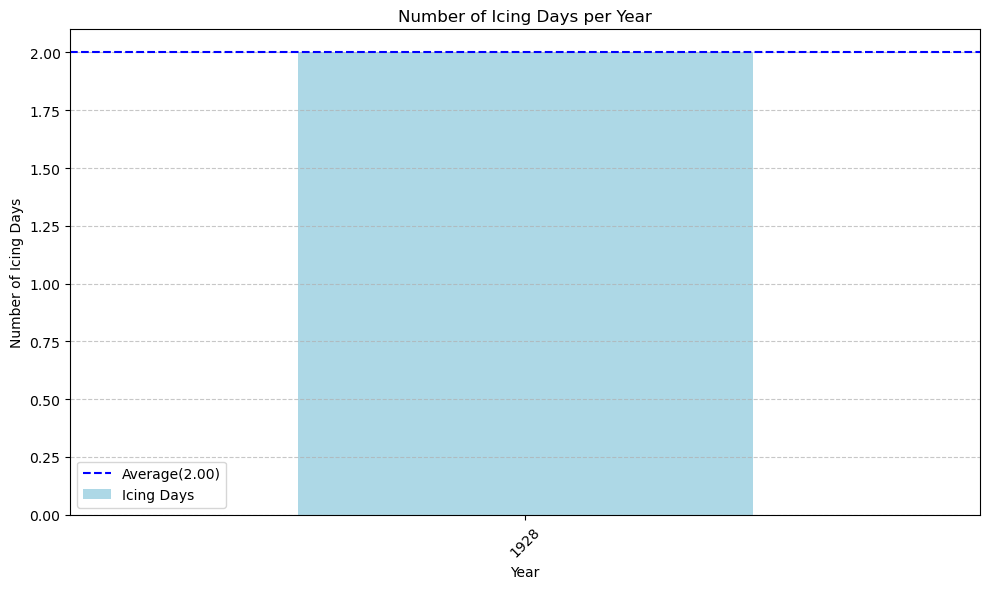

Linear Regression Results for Icing Days:
Slope Estimate: nan
Slope Error: nan
R-squared Value: 0.0
P-value: nan


C:\Users\manda\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\manda\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\manda\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [6]:
import numpy as np
import scipy.stats as stats

# Remove rows with -99.9 values
filtered_df = df[df['tmax'] != -99.9]


# Filter for days where maximum temperature is less than 0°C
icing_days = filtered_df[filtered_df['tmax'] < 0]
print(icing_days)

# Count the number of icing days for each year
icing_days_count = icing_days.groupby('year').size()

# Calculate the average value
average_value_icing = icing_days_count.mean()

print(average_value_icing)

# Plotting
plt.figure(figsize=(10, 6))
icing_days_count.plot(kind='bar', color='lightblue', label='Icing Days')
plt.axhline(y=average_value_icing, color='blue', linestyle='--', label=f'Average({average_value_icing:.2f})')
plt.title('Number of Icing Days per Year')
plt.xlabel('Year')
plt.ylabel('Number of Icing Days')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate linear regression
x_icing = icing_days_count.index.values
y_icing = icing_days_count.values
slope_icing, intercept_icing, r_value_icing, p_value_icing, std_err_icing = stats.linregress(x_icing, y_icing)

# Calculate R-squared value
r_squared_icing = r_value_icing ** 2

print("Linear Regression Results for Icing Days:")
print(f"Slope Estimate: {slope_icing}")
print(f"Slope Error: {std_err_icing}")
print(f"R-squared Value: {r_squared_icing}")
print(f"P-value: {p_value_icing}")


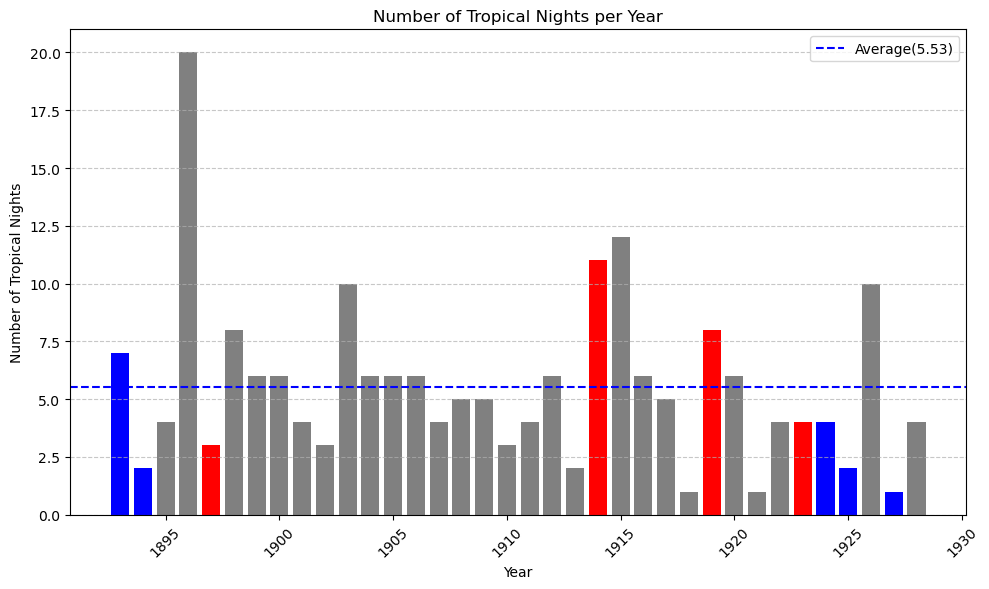

Linear Regression Results for Tropical Nights:
Slope Estimate: -0.0812097812097812
Slope Error: 0.05832539142699943
R-squared Value: 0.0539435461126788
P-value: 0.172854470903865


In [7]:
import numpy as np
import scipy.stats as stats

# Remove rows with -99.9 values
filtered_df = df[df['tmin'] != -99.9]

# Filter for days where minimum temperature is greater than 20°C
tropical_nights = filtered_df[filtered_df['tmin'] > 20]

# Count the number of tropical nights for each year
tropical_nights_count = tropical_nights.groupby('year').size()

# Calculate the average value
average_value_tropical = tropical_nights_count.mean()
Hot_Years = [1897,1914,1919,1923]
Cold_Years = [1893,1894,1924,1925,1927]

# Plotting
plt.figure(figsize=(10, 6))
bar_colors = ['Grey' if year not in Hot_Years and year not in Cold_Years else 'red' if year in Hot_Years else 'blue' for year in tropical_nights_count.index]
plt.bar(tropical_nights_count.index, tropical_nights_count.values, color=bar_colors)

plt.axhline(y=average_value_tropical, color='blue', linestyle='--', label=f'Average({average_value_tropical:.2f})')
plt.title('Number of Tropical Nights per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tropical Nights')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate linear regression
x_tropical = tropical_nights_count.index.values
y_tropical = tropical_nights_count.values
slope_tropical, intercept_tropical, r_value_tropical, p_value_tropical, std_err_tropical = stats.linregress(x_tropical, y_tropical)

# Calculate R-squared value
r_squared_tropical = r_value_tropical ** 2

print("Linear Regression Results for Tropical Nights:")
print(f"Slope Estimate: {slope_tropical}")
print(f"Slope Error: {std_err_tropical}")
print(f"R-squared Value: {r_squared_tropical}")
print(f"P-value: {p_value_tropical}")


Growing Season Length (GSL) in days: nan


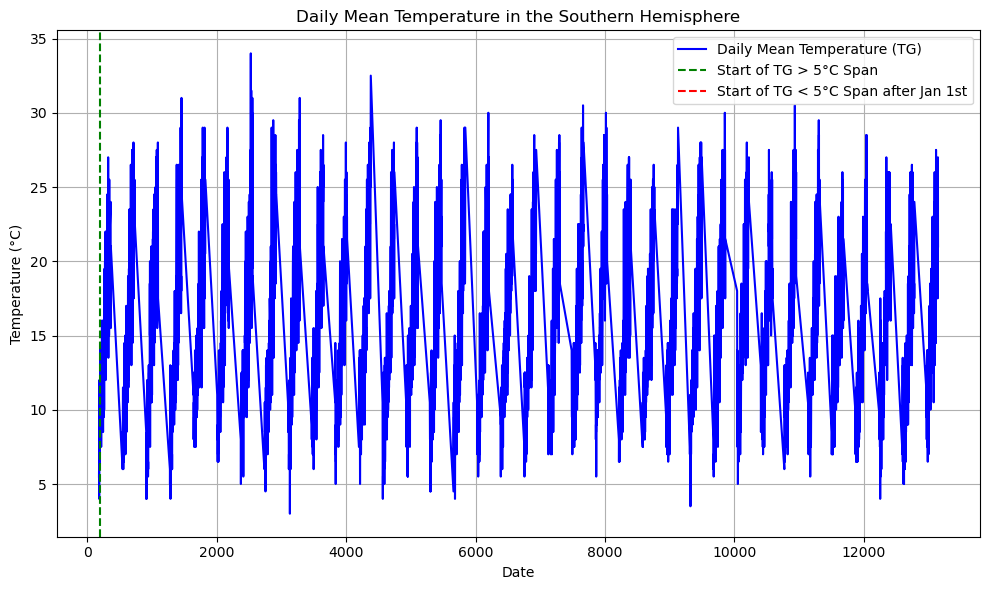

In [8]:
import numpy as np

# Filter for Southern Hemisphere (SH) data
sh_df = df[df['month'] >= 7]  # Considering months from July to December as SH

# Remove rows with -99.9 values
sh_df = sh_df[(sh_df['tmin'] != -99.9) & (sh_df['tmax'] != -99.9)]

# Calculate daily mean temperature (TG)
sh_df['TG'] = (sh_df['tmax'] + sh_df['tmin']) / 2

# Find spans of at least 6 consecutive days with TG > 5°C
sh_df['TG_gt_5'] = sh_df['TG'] > 5
sh_df['TG_gt_5_span'] = sh_df['TG_gt_5'].astype(int).groupby((~sh_df['TG_gt_5']).cumsum()).cumsum()
first_gt_5_span_start = sh_df[sh_df['TG_gt_5_span'] == 6].index.min()

# Find spans of at least 6 consecutive days with TG < 5°C after January 1st
sh_df_after_jan = sh_df[sh_df['month'] >= 1]  # Consider months from January to December after January
sh_df_after_jan['TG_lt_5'] = sh_df_after_jan['TG'] < 5
sh_df_after_jan['TG_lt_5_span'] = sh_df_after_jan['TG_lt_5'].astype(int).groupby((~sh_df_after_jan['TG_lt_5']).cumsum()).cumsum()
first_lt_5_span_start = sh_df_after_jan[sh_df_after_jan['TG_lt_5_span'] == 6].index.min()

# Calculate Growing Season Length (GSL)
if first_gt_5_span_start is not None and first_lt_5_span_start is not None:
    gsl = first_lt_5_span_start - first_gt_5_span_start
else:
    gsl = np.nan

print("Growing Season Length (GSL) in days:", gsl)

import matplotlib.pyplot as plt

# Plot daily mean temperature (TG)
plt.figure(figsize=(10, 6))
plt.plot(sh_df.index, sh_df['TG'], color='blue', label='Daily Mean Temperature (TG)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Mean Temperature in the Southern Hemisphere')
plt.grid(True)

# Mark the start of the first span with TG > 5°C
if first_gt_5_span_start is not None:
    plt.axvline(x=first_gt_5_span_start, color='green', linestyle='--', label='Start of TG > 5°C Span')

# Mark the start of the first span with TG < 5°C after January 1st
if first_lt_5_span_start is not None:
    plt.axvline(x=first_lt_5_span_start, color='red', linestyle='--', label='Start of TG < 5°C Span after Jan 1st')

plt.legend()
plt.tight_layout()
plt.show()


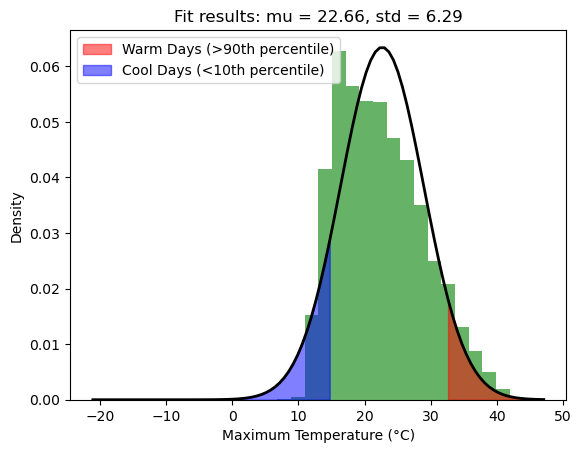

Percentage of days with maximum temperature > 90th percentile (Warm Days): 7.91%
Percentage of days with maximum temperature < 10th percentile (Cool Days): 6.81%
Temperature threshold for warm days (> 90th percentile): 32.00°C
Percentage of days with maximum temperature > 90th percentile: 7.91%
Temperature threshold for cool days (< 10th percentile): 15.00°C
Percentage of days with maximum temperature < 10th percentile: 6.81%


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming 'df' is your DataFrame and it contains a column 'Maximum.Temp..C.' for maximum temperatures

# Remove rows where maximum temperature is -99.9 (missing values)
cleaned_df = df[df['tmax'] != -99.9]

# Step 1: Plot Gaussian Distribution
mu, std = norm.fit(cleaned_df['tmax'])

# Plot the histogram
plt.hist(cleaned_df['tmax'], bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = %.2f, std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Maximum Temperature (°C)')
plt.ylabel('Density')

# Step 2 & 3: Identify extreme warm and cool days and calculate percentages
percentile_90th = np.percentile(cleaned_df['tmax'], 90)
percentile_10th = np.percentile(cleaned_df['tmax'], 10)

warm_days_percentage = (cleaned_df['tmax'] > percentile_90th).mean() * 100
cool_days_percentage = (cleaned_df['tmax'] < percentile_10th).mean() * 100

# Highlighting areas for warm and cool days
plt.fill_between(x, 0, p, where=(x>percentile_90th), color='red', alpha=0.5, label='Warm Days (>90th percentile)')
plt.fill_between(x, 0, p, where=(x<percentile_10th), color='blue', alpha=0.5, label='Cool Days (<10th percentile)')

plt.legend()
plt.show()

# Printing percentages
print(f"Percentage of days with maximum temperature > 90th percentile (Warm Days): {warm_days_percentage:.2f}%")
print(f"Percentage of days with maximum temperature < 10th percentile (Cool Days): {cool_days_percentage:.2f}%")

# Printing the temperature thresholds along with percentages
print(f"Temperature threshold for warm days (> 90th percentile): {percentile_90th:.2f}°C")
print(f"Percentage of days with maximum temperature > 90th percentile: {warm_days_percentage:.2f}%")

print(f"Temperature threshold for cool days (< 10th percentile): {percentile_10th:.2f}°C")
print(f"Percentage of days with maximum temperature < 10th percentile: {cool_days_percentage:.2f}%")


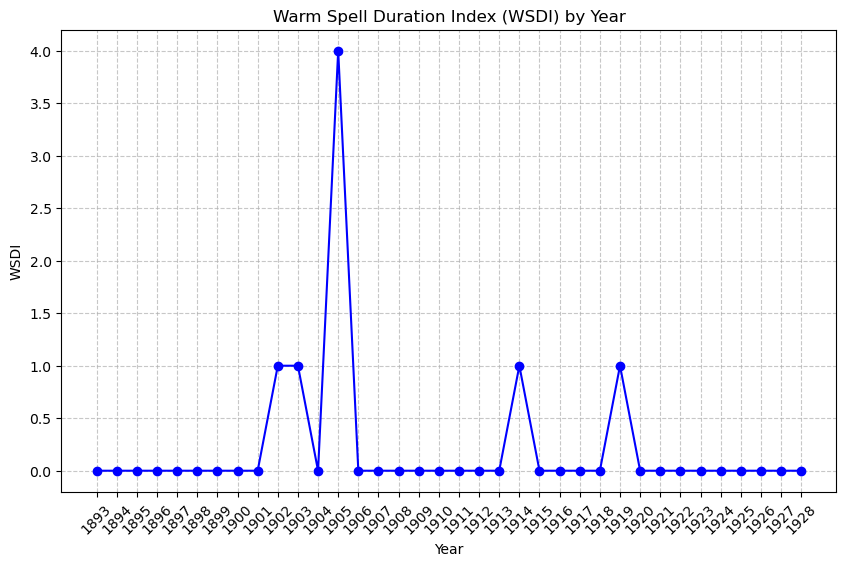

In [10]:
import matplotlib.pyplot as plt

# Filter out rows with Tmax values equal to -99.9, and exclude years 1877 and 1922
filtered_df = df[(df['tmax'] != -99.9)]

# Calculate the 90th percentile of daily maximum temperature
TXin90 = filtered_df['tmax'].quantile(0.9)

# Calculate consecutive days where TX > 90th percentile
consecutive_days = filtered_df['tmax'] > TXin90
consecutive_days = consecutive_days.astype(int).groupby((consecutive_days != consecutive_days.shift()).cumsum()).cumsum()

# Count days with at least 6 consecutive days where TX > 90th percentile for each year
WSDI_per_year = consecutive_days.groupby(filtered_df['year']).apply(lambda x: (x >= 6).sum())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(WSDI_per_year.index, WSDI_per_year.values, marker='o', linestyle='-', color='blue')
plt.title('Warm Spell Duration Index (WSDI) by Year')
plt.xlabel('Year')
plt.ylabel('WSDI')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)


# Set x-axis ticks to display all years
plt.xticks(range(min(WSDI_per_year.index), max(WSDI_per_year.index) + 1), rotation=45)
plt.show()


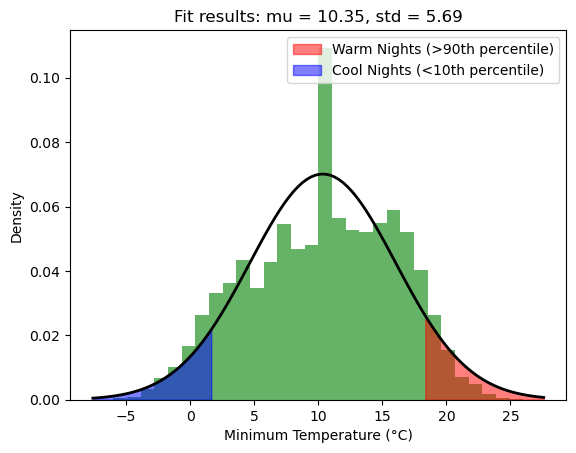

Percentage of days with minimum temperature > 90th percentile (Warm Nights): 5.99%
Percentage of days with minimum temperature < 10th percentile (Cool Nights): 6.88%
Temperature threshold for warm Nights (> 90th percentile): 18.00°C
Percentage of days with minimum temperature > 90th percentile: 5.99%
Temperature threshold for cool Nights (< 10th percentile): 2.00°C
Percentage of days with minimum temperature < 10th percentile: 6.88%


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming 'df' is your DataFrame and it contains a column 'Maximum.Temp..C.' for maximum temperatures

# Remove rows where maximum temperature is -99.9 (missing values)
cleaned_df = df[df['tmin'] != -99.9]

# Step 1: Plot Gaussian Distribution
mu, std = norm.fit(cleaned_df['tmin'])

# Plot the histogram
plt.hist(cleaned_df['tmin'], bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = %.2f, std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Minimum Temperature (°C)')
plt.ylabel('Density')

# Step 2 & 3: Identify extreme warm and cool days and calculate percentages
percentile_90th = np.percentile(cleaned_df['tmin'], 90)
percentile_10th = np.percentile(cleaned_df['tmin'], 10)

warm_nights_percentage = (cleaned_df['tmin'] > percentile_90th).mean() * 100
cool_nights_percentage = (cleaned_df['tmin'] < percentile_10th).mean() * 100

# Highlighting areas for warm and cool days
plt.fill_between(x, 0, p, where=(x>percentile_90th), color='red', alpha=0.5, label='Warm Nights (>90th percentile)')
plt.fill_between(x, 0, p, where=(x<percentile_10th), color='blue', alpha=0.5, label='Cool Nights (<10th percentile)')

plt.legend()
plt.show()

# Printing percentages
print(f"Percentage of days with minimum temperature > 90th percentile (Warm Nights): {warm_nights_percentage:.2f}%")
print(f"Percentage of days with minimum temperature < 10th percentile (Cool Nights): {cool_nights_percentage:.2f}%")

# Printing the temperature thresholds along with percentages
print(f"Temperature threshold for warm Nights (> 90th percentile): {percentile_90th:.2f}°C")
print(f"Percentage of days with minimum temperature > 90th percentile: {warm_nights_percentage:.2f}%")

print(f"Temperature threshold for cool Nights (< 10th percentile): {percentile_10th:.2f}°C")
print(f"Percentage of days with minimum temperature < 10th percentile: {cool_nights_percentage:.2f}%")


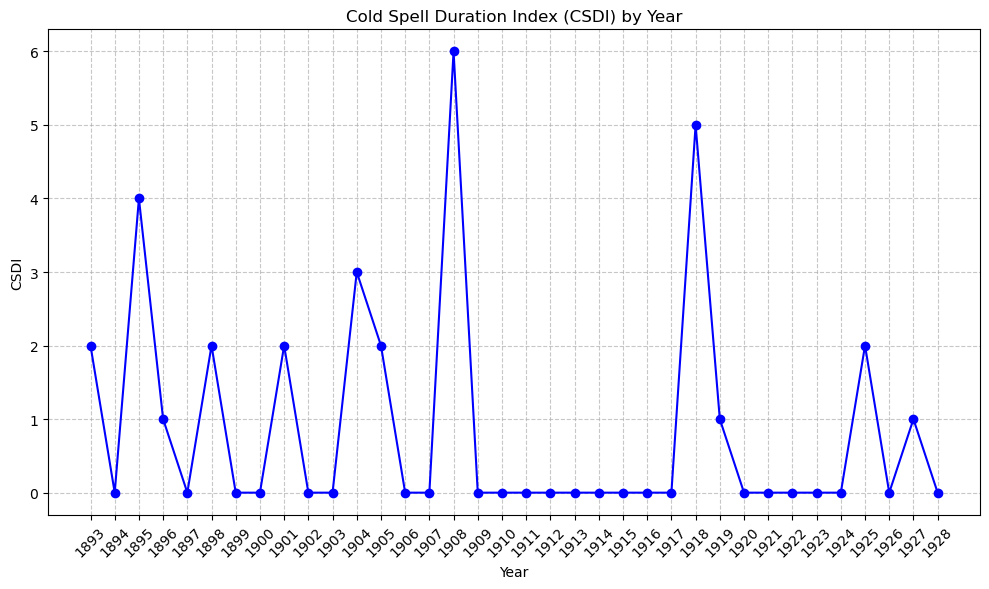

In [12]:
import matplotlib.pyplot as plt

# Filter out rows with Tmin values equal to -99.9, and exclude years 1877 and 1922
filtered_df = df[(df['tmin'] != -99.9)]

# Calculate the 10th percentile of daily minimum temperature
TNin10 = filtered_df['tmin'].quantile(0.1)

# Calculate consecutive days where TN < 10th percentile
consecutive_days = filtered_df['tmin'] < TNin10
consecutive_days = consecutive_days.astype(int).groupby((consecutive_days != consecutive_days.shift()).cumsum()).cumsum()

# Count days with at least 6 consecutive days where TN < 10th percentile for each year
CSDI_per_year = consecutive_days.groupby(filtered_df['year']).apply(lambda x: (x >= 6).sum())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(CSDI_per_year.index, CSDI_per_year.values, marker='o', linestyle='-', color='blue')
plt.title('Cold Spell Duration Index (CSDI) by Year')
plt.xlabel('Year')
plt.ylabel('CSDI')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Set x-axis ticks to display all years
plt.xticks(range(min(CSDI_per_year.index), max(CSDI_per_year.index) + 1), rotation=45)

plt.tight_layout()
plt.show()


C:\Users\manda\AppData\Local\Temp\ipykernel_14880\4223546084.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['daily_mean_temp'] = (cleaned_df['tmax'] + cleaned_df['tmin']) / 2


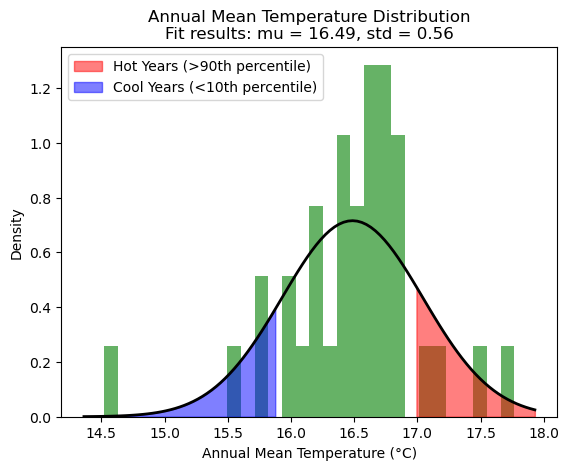

Hot Years (Annual Mean Temperature > 90th percentile):
Int64Index([1897, 1914, 1919, 1923], dtype='int64', name='year')

Cool Years (Annual Mean Temperature < 10th percentile):
Int64Index([1893, 1894, 1925, 1927], dtype='int64', name='year')

Temperature thresholds:
90th percentile: 16.98°C
10th percentile: 15.89°C


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming 'df' is your DataFrame

# Filter out rows with -99.9 values
cleaned_df = df[(df['tmax'] != -99.9) & (df['tmin'] != -99.9)]

# Calculate daily mean temperature
cleaned_df['daily_mean_temp'] = (cleaned_df['tmax'] + cleaned_df['tmin']) / 2

# Calculate annual mean temperature for each year
annual_mean_temp = cleaned_df.groupby('year')['daily_mean_temp'].mean()

# Step 1: Plot Gaussian Distribution
mu, std = norm.fit(annual_mean_temp)

# Plot the histogram
plt.hist(annual_mean_temp, bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

title = "Annual Mean Temperature Distribution\nFit results: mu = %.2f, std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Annual Mean Temperature (°C)')
plt.ylabel('Density')

# Step 2 & 3: Identify hot and cool years based on percentiles and plot
percentile_90th = np.percentile(annual_mean_temp, 90)
percentile_10th = np.percentile(annual_mean_temp, 10)

hot_years = annual_mean_temp[annual_mean_temp > percentile_90th].index
cool_years = annual_mean_temp[annual_mean_temp < percentile_10th].index

# Highlighting areas for hot and cool years
plt.fill_between(x, 0, p, where=(x > percentile_90th), color='red', alpha=0.5, label='Hot Years (>90th percentile)')
plt.fill_between(x, 0, p, where=(x < percentile_10th), color='blue', alpha=0.5, label='Cool Years (<10th percentile)')

plt.legend()
plt.show()

# Printing hot and cool years
print("Hot Years (Annual Mean Temperature > 90th percentile):")
print(hot_years)

print("\nCool Years (Annual Mean Temperature < 10th percentile):")
print(cool_years)

# Printing threshold values
print("\nTemperature thresholds:")
print(f"90th percentile: {percentile_90th:.2f}°C")
print(f"10th percentile: {percentile_10th:.2f}°C")

Hot Years:
Int64Index([1897, 1914, 1919, 1923], dtype='int64', name='year')

Cold Years:
Int64Index([1893, 1894, 1924, 1925, 1927], dtype='int64', name='year')


C:\Users\manda\AppData\Local\Temp\ipykernel_14880\1759316525.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['daily_mean_temp'] = (cleaned_df['tmax'] + cleaned_df['tmin']) / 2


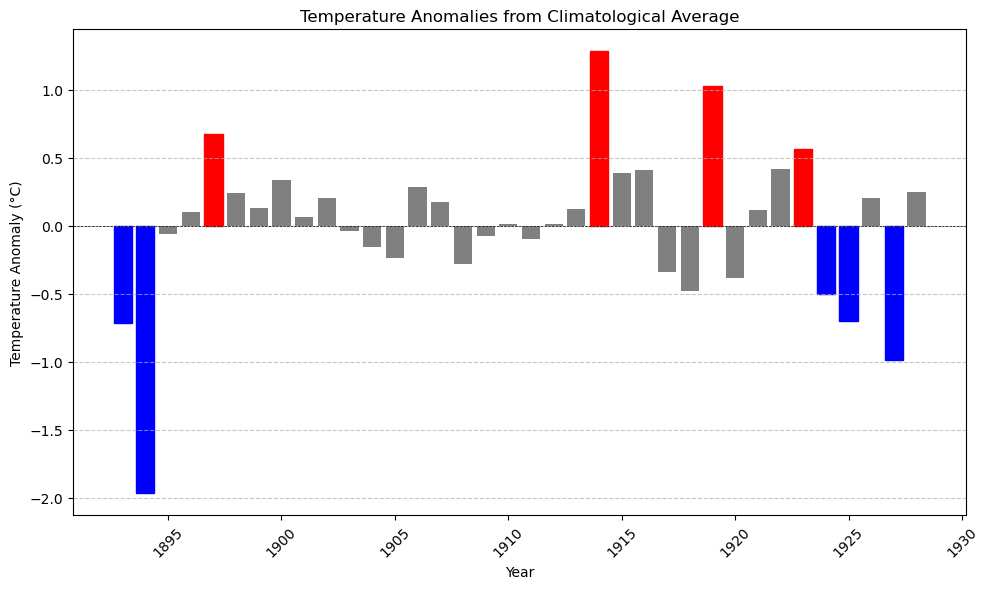

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing temperature data

# Exclude rows with -99.9 values for both tmax and tmin
cleaned_df = df[(df['tmax'] != -99.9) & (df['tmin'] != -99.9)]

# Calculate daily mean temperature
cleaned_df['daily_mean_temp'] = (cleaned_df['tmax'] + cleaned_df['tmin']) / 2

# Calculate annual average temperature
annual_avg_temp = cleaned_df.groupby('year')['daily_mean_temp'].mean()

# Calculate temperature anomalies compared to the climatological average 
climatological_avg = annual_avg_temp.mean()
temperature_anomalies = annual_avg_temp - climatological_avg

# Define thresholds for hot and cold years
hot_threshold = 0.5
cold_threshold = -0.5

# Identify hot and cold years based on temperature anomalies
hot_years = temperature_anomalies[temperature_anomalies > hot_threshold].index
cold_years = temperature_anomalies[temperature_anomalies < cold_threshold].index

# Print hot and cold years
print("Hot Years:")
print(hot_years)
print("\nCold Years:")
print(cold_years)

# Plotting
plt.figure(figsize=(10, 6))

# Plot gray bars for all years
bars = plt.bar(temperature_anomalies.index, temperature_anomalies.values, color='gray')

# Highlight hot and cold years
for bar in bars:
    year = bar.get_height()
    if year > hot_threshold:
        bar.set_color('red')  # Red for hot years
    elif year < cold_threshold:
        bar.set_color('blue')  # Blue for cold years

plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Add horizontal line at y=0 for reference
plt.title('Temperature Anomalies from Climatological Average')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [15]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [13]:
import folium
from IPython.display import display

# Latitude and Longitude of the locations
locations = {
    "Eversleigh": (-30.443, 151.535),
    "Wollong": (-34.52, 149.33),
    "Maryland": (-28.5417, 151.9909)
}

# Coordinates of the New England region border (approximation)
new_england_border = [
    (-30.4667, 150.9667),
    (-30.4667, 151.0167),
    (-30.4833, 151.0333),
    (-30.5, 151.0167),
    (-30.5167, 151.0167),
    (-30.5333, 151.0333),
    (-30.55, 151.0333),
    (-30.5667, 151),
    (-30.5667, 150.9833),
    (-30.55, 150.9667),
    (-30.5333, 150.95),
    (-30.5167, 150.9333),
    (-30.5, 150.9167),
    (-30.4833, 150.9333),
    (-30.4667, 150.95)
]

# Create a map centered around the mean coordinates
mean_lat = sum(lat for lat, lon in locations.values()) / len(locations)
mean_lon = sum(lon for lat, lon in locations.values()) / len(locations)
mymap = folium.Map(location=[mean_lat, mean_lon], zoom_start=6)

# Add markers for each location with labels
for loc_name, coord in locations.items():
    folium.Marker(location=coord, popup=loc_name).add_to(mymap)

# Highlight the New England region border
folium.Polygon(locations=new_england_border, color='red', fill=True, fill_color='#3186cc', fill_opacity=0.2).add_to(mymap)

# Display the map within the Python environment
display(mymap)


In [17]:
pip install geopandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [11]:
import folium
from IPython.display import display
import json

# Latitude and Longitude of the locations
locations = {
    "Eversleigh": (-30.443, 151.535),
    "Wollong": (-34.52, 149.33),
    "Maryland": (-28.5417, 151.9909)
}

# Create a map centered around the mean coordinates
mean_lat = sum(lat for lat, lon in locations.values()) / len(locations)
mean_lon = sum(lon for lat, lon in locations.values()) / len(locations)
mymap = folium.Map(location=[mean_lat, mean_lon], zoom_start=6)

# Add markers for each location with labels
for loc_name, coord in locations.items():
    folium.Marker(location=coord, popup=folium.Popup(loc_name)).add_to(mymap)

# Load New South Wales border from a local GeoJSON file
with open(r'C:\Users\manda\Downloads\NSW_SA3 (1).json', "r") as f:
    nsw_border = json.load(f)
folium.GeoJson(nsw_border).add_to(mymap)

# Display the map within the Python environment
display(mymap)


In [1]:
import folium
from IPython.display import display
import json

# Latitude and Longitude of the locations
locations = {
    "Eversleigh": (-30.443, 151.535),
    "Wollong": (-34.52, 149.33),
    "Maryland": (-28.5417, 151.9909)
}

# Create a map centered around the mean coordinates
mean_lat = sum(lat for lat, lon in locations.values()) / len(locations)
mean_lon = sum(lon for lat, lon in locations.values()) / len(locations)
mymap = folium.Map(location=[mean_lat, mean_lon], zoom_start=6)

# Add markers for each location with labels
for loc_name, coord in locations.items():
    folium.Marker(location=coord, popup=folium.Popup(loc_name)).add_to(mymap)

# Load New South Wales border from a local GeoJSON file
with open(r'C:\Users\manda\Downloads\NSW_LGA (1).json', "r") as f:
    nsw_border = json.load(f)
folium.GeoJson(nsw_border).add_to(mymap)

# Display the map within the Python environment
display(mymap)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


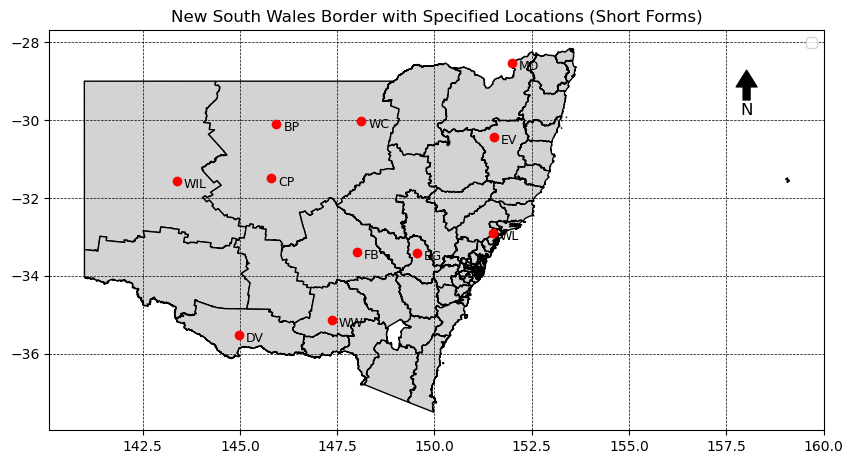

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load New South Wales border from the GeoJSON file
nsw_border_gdf = gpd.read_file(r'C:\Users\manda\Downloads\NSW_SA3 (1).json')

# Latitude and Longitude of the locations
locations = {
    "Eversleigh": (-30.443, 151.535),
    "Wollong": (-32.90, 151.50),
    "Maryland":(-28.5417, 151.9909),
    "Bathurst Gaol": (-33.4167, 149.55),
    "Deniliquin (Visitor Information Centre)": (-35.5283, 144.9651),
    "Bourke Post Office": (-30.0917, 145.9358),
    "Wagga Wagga (Kooringal)": (-35.1333, 147.3667),
    "Forbes (Camp Street)": (-33.3892, 148.0081),
    "Walgett Council Depot": (-30.0236, 148.1218),
    "Wilcannia (Reid St)": (-31.5631, 143.3747),
    "Cobar Post Office": (-31.5, 145.8)
}

# Plot the NSW border
fig, ax = plt.subplots(figsize=(10, 8))
nsw_border_gdf.plot(ax=ax, color='lightgray', edgecolor='black')

# Short forms for locations
short_forms = {
    "Eversleigh": "EV",
    "Wollong": "WL",
    "Maryland": "MD",
    "Bathurst Gaol": "BG",
    "Deniliquin (Visitor Information Centre)": "DV",
    "Bourke Post Office": "BP",
    "Wagga Wagga (Kooringal)": "WW",
    "Forbes (Camp Street)": "FB",
    "Walgett Council Depot": "WC",
    "Wilcannia (Reid St)": "WIL",
    "Cobar Post Office": "CP"
}

# Plot the locations with annotation using short forms
for loc_name, coord in locations.items():
    ax.plot(coord[1], coord[0], 'ro')  # Longitude, Latitude
    short_form = short_forms[loc_name]
    ax.annotate(short_form, xy=(coord[1], coord[0]), xytext=(5, -5), textcoords="offset points", fontsize=9)

ax.grid(True, color='black', linestyle='--', linewidth=0.5)

# Add a legend
ax.legend()

# Add a north arrow
x, y, arrow_length = 0.9, 0.9, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=12, xycoords=ax.transAxes)

# Set plot title
plt.title("New South Wales Border with Specified Locations (Short Forms)")


# Set aspect ratio as equal
ax.set_aspect('equal')

# Remove axes
ax.axis('on')

# Show plot
plt.show()


In [ ]:
 "Armidale":(-30.52, 151.67),
        "Armidale":"AR",

In [9]:
pip install plotly geopandas pandas


Note: you may need to restart the kernel to use updated packages.


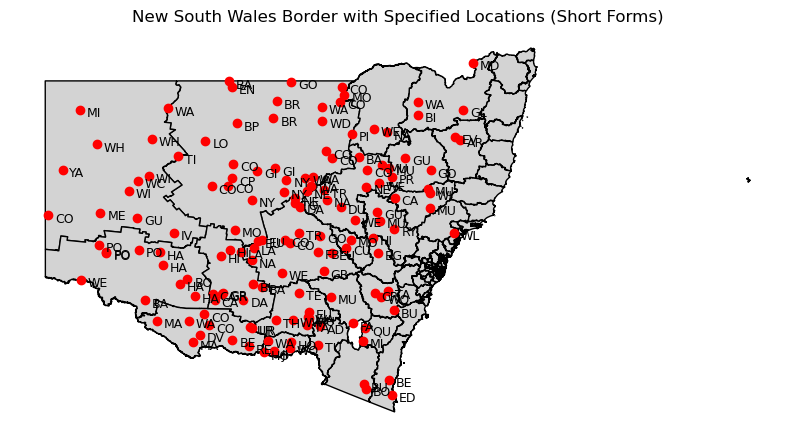

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load New South Wales border from the GeoJSON file
nsw_border_gdf = gpd.read_file(r'C:\Users\manda\Downloads\NSW_SA3 (1).json')

# Latitude and Longitude of the locations
locations = {
    "Eversleigh": (-30.443, 151.535),
    "Wollong": (-32.90, 151.50),
    "Maryland": (-28.5417, 151.9909),
    "Bathurst Gaol": (-33.4167, 149.55),
    "Deniliquin (Visitor Information Centre)": (-35.5283, 144.9651),
    "Bourke Post Office": (-30.0917, 145.9358),
    "Wagga Wagga (Kooringal)": (-35.1333, 147.3667),
    "Forbes (Camp Street)": (-33.3892, 148.0081),
    "Walgett Council Depot": (-30.0236, 148.1218),
    "Wilcannia (Reid St)": (-31.5631, 143.3747),
    "Cobar Post Office": (-31.5, 145.8),
    "BARADINE POST OFFICE": (-30.948, 149.0663),
    "BARRINGUN": (-29.0128, 145.7132),
    "COBAR (TINDAREY)": (-31.1227, 145.8319),
    "CONDOBOLIN RETIREMENT VILLAGE": (-33.0818, 147.1524),
    "GIRILAMBONE (BOOROOMUGGA)": (-31.3078, 146.4392),
    "GULGONG POST OFFICE": (-32.3634, 149.5329),
    "HILLSTON AIRPORT": (-33.4915, 145.5248),
    "LAKE CARGELLIGO AIRPORT": (-33.2832, 146.3706),
    "LOUTH (BLOXHAM STREET)": (-30.5357, 145.116),
    "NARROMINE (MUMBLE PEG)": (-32.0646, 148.2353),
    "NYNGAN (MUDALL)": (-31.8576, 147.1343),
    "RYLSTONE (ILFORD RD)": (-32.8079, 149.977),
    "WALGETT (DUNGALEAR)": (-29.6644, 148.1152),
    "WELLINGTON (D&J RURAL)": (-32.5635, 148.9503),
    "WOOMARGAMA (WOOMARGAMA ESTATE)": (-35.8557, 147.2852),
    "BREWARRINA (TALAWANTA)": (-29.5213, 146.9487),
    "WILCANNIA (BILLILLA)": (-31.832, 143.1507),
    "CARRATHOOL (GUM CREEK)": (-34.628, 145.3539),
    "CONARGO (PUCKAWIDGEE)": (-35.2849, 145.2098),
    "YANCO GLEN (CORONA HOMESTEAD)": (-31.2873, 141.4437),
    "GOONUMBLA (CORADGERY)": (-32.9744, 148.0632),
    "MILPARINKA HOTEL": (-29.7378, 141.8847),
    "NYMAGEE (KENMURE STATION)": (-32.0641, 146.3192),
    "POONCARIE (MULURULU STATION)": (-33.3393, 143.3986),
    "POONCARIE MAIL AGENCY": (-33.3856, 142.5696),
    "PREMER POST OFFICE": (-31.4568, 149.9001),
    "TARALGA POST OFFICE": (-34.4048, 149.8197),
    "THE ROCK (BULLENBONG)": (-35.1555, 146.9356),
    "WALBUNDRIE (CREDITON STREET)": (-35.6852, 146.7273),
    "WARREN (MUMBLEBONE)": (-31.4986, 147.6865),
    "ADELONG (TUMUT ST)": (-35.3085, 148.0641),
    "TILPA (TONGO ROAD)": (-30.937, 144.416),
    "BUNGONIA (INVERARY PARK)": (-34.8996, 149.9709),
    "CARRATHOOL (UARDRY)": (-34.4661, 145.3026),
    "COBAR (LERIDA)": (-31.6982, 145.7045),
    "COCKBURN (BURTA)": (-32.4555, 141.0785),
    "COLLARENEBRI (GOONDOOBLUIE)": (-29.1507, 148.6251),
    "CROOKWELL POST OFFICE": (-34.4578, 149.4693),
    "DANDALOO (TYRIE HOMESTEAD)": (-32.2367, 147.5538),
    "GIRILAMBONE (AMPOL)": (-31.2506, 146.9038),
    "MOGIL MOGIL (BENIMORA)": (-29.3541, 148.6895),
    "PILLIGA POST OFFICE": (-30.3515, 148.8843),
    "TRANGIE (OLD BUNDEMAR)": (-31.8093, 148.1584),
    "TRUNDLE (MURRUMBOGIE)": (-32.9018, 147.5224),
    "COLLARENEBRI (ALBERT ST)": (-29.5406, 148.5817),
    "COONAMBLE (NARDOO)": (-30.8095, 148.2284),
    "CUDAL POST OFFICE": (-33.2869, 148.7396),
    "WANAARING POST OFFICE": (-29.7029, 144.1484),
    "EUABALONG (BOOBEROI)": (-33.0801, 146.5731),
    "EUABALONG (LACHLAN ST)": (-33.1094, 146.4736),
    "EURONGILLY (BUNDALEER)": (-34.9308, 147.767),
    "FAIRLIGHT STATION": (-35.2286, 148.9143),
    "HOLBROOK (RSL)": (-35.7225, 147.3178),
    "HOWLONG POST OFFICE": (-35.9787, 146.6274),
    "IVANHOE POST OFFICE": (-32.8999, 144.2995),
    "JINDERA POST OFFICE": (-35.9544, 146.8891),
    "LAKE CARGELLIGO (MERRI-MERRIGAL)": (-33.3935, 146.0385),
    "MICHELAGO (SOGLIO)": (-35.6797, 149.1601),
    "MOLONG (HILL ST)": (-33.0881, 148.8584),
    "MULLALEY (BANDO)": (-31.2342, 149.8345),
    "MULLALEY (GARRAWILLA)": (-31.1711, 149.6456),
    "MURRUMBURRAH (HISTORICAL SOCIETY)": (-34.55, 148.351),
    "POONCARIE (MOORARA)": (-33.2158, 142.3868),
    "TOTTENHAM (BURDENDA)": (-32.1266, 147.4067),
    "WANTABADGERY": (-35.0581, 147.753),
    "WARREN (FRAWLEY ST)": (-31.6976, 147.8348),
    "WEE WAA (GEORGE ST)": (-30.2257, 149.4452),
    "WEETALIBA (WEETALABAH)": (-31.6335, 149.575),
    "BOMBALA (THERRY STREET)": (-36.9113, 149.2379),
    "ENNGONIA (BELALIE)": (-29.1581, 145.8068),
    "EUGOWRA POST OFFICE": (-33.4265, 148.3691),
    "GRENFELL (MANGANESE RD)": (-33.8934, 148.1523),
    "MATHOURA (MATHOURA STATION)": (-35.7228, 144.7865),
    "MOUNT HOPE (CYPRESS GROVE)": (-32.8345, 145.8772),
    "NEVERTIRE (BEVERLEY)": (-32.0154, 147.428),
    "NEVERTIRE (CLYDE ST)": (-31.835, 147.7189),
    "RENNIE (PINE VIEW)": (-35.8215, 146.2243),
    "TUMBARUMBA POST OFFICE": (-35.778, 148.0122),
    "GLEN INNES POST OFFICE": (-29.7368, 151.7366),
    "WANGANELLA (ZARA)": (-35.1721, 144.6966),
    "CONDOBOLIN (BORAMBIL PARK)": (-33.1624, 147.2846),
    "WENTWORTH POST OFFICE": (-34.1065, 141.9189),
    "EDEN (MARINE RESCUE EDEN)": (-37.075, 149.914),
    "CASSILIS POST OFFICE": (-32.0051, 149.9815),
    "DUBBO (DARLING STREET)": (-32.2385, 148.6089),
    "MUDGEE (GEORGE STREET)": (-32.5956, 149.5956),
    "NARRABRI BOWLING CLUB": (-30.3222, 149.782),
    "QUEANBEYAN BOWLING CLUB": (-35.3552, 149.2292),
    "URANA (BUTHERWAH)": (-35.3526, 146.31),
    "URANA POST OFFICE": (-35.3305, 146.2652),
    "BREWARRINA HOSPITAL": (-29.9614, 146.8651),
    "GOODOOGA (BRENDA)": (-29.0299, 147.3128),
    "TARCUTTA POST OFFICE": (-35.2765, 147.7362),
    "HATFIELD (CLARE)": (-33.4021, 143.9375),
    "DARLINGTON POINT (TUBBO)": (-34.6313, 146.0941),
    "BINYA POST OFFICE": (-34.2289, 146.3444),
    "BOOLIGAL (ULONGA)": (-34.0965, 144.6529),
    "MENINDEE POST OFFICE": (-32.3937, 142.4173),
    "HATFIELD (BENILKIE)": (-33.7272, 144.0175),
    "GUM LAKE (ALBEMARLE)": (-32.5271, 143.371),
    "GROONGAL (GROONGAL STATION)": (-34.442, 145.5612),
    "HAY (CORRONG)": (-34.2175, 144.4661),
    "HAY (MILLER STREET)": (-34.5194, 144.8545),
    "MALLAN (NIEMUR VALLEY)": (-35.1619, 143.873),
    "BARELLAN POST OFFICE": (-34.2849, 146.5714),
    "BERRIGAN POST OFFICE": (-35.6576, 145.8124),
    "WHITE CLIFFS (TONGO)": (-30.4921, 143.7456),
    "COONAMBLE COMPARISON": (-30.9753, 148.3806),
    "MUNDARLO (YABTREE)": (-35.0996, 147.7767),
    "NEILREX (CAIGAN)": (-31.7231, 149.2558),
    "POONCARIE (TARCOOLA)": (-33.4268, 142.5719),
    "WARREN (HADDON RIG)": (-31.457, 147.8824),
    "BALRANALD (RSL)": (-34.6398, 143.561),
    "BEGA (NEWTOWN ROAD)": (-36.6883, 149.838),
    "BUKALONG STATION": (-36.7969, 149.1972),
    "CONARGO (WILLURAH)": (-34.9953, 145.0915),
    "COONABARABRAN (SHOWGROUNDS)": (-31.2786, 149.2786),
    "WILCANNIA (MOUNT MURCHISON)": (-31.4469, 143.6548),
    "NYNGAN AIRPORT": (-31.5495, 147.1961),
    "WOODHOUSELEE (LEESTON)": (-34.545, 149.6246),
    "WHITE CLIFFS (WONNAMINTA)": (-30.6322, 142.3219),
    "COBAR (THE MEADOWS)": (-31.7108, 145.2764),
    "GROONGAL (GUNDALINE)": (-34.4774, 145.5471),
    "HILL END POST OFFICE": (-33.0362, 149.4146),
    "HILLSTON (HUNTHAWANG)": (-33.3413, 145.748),
    "NARADHAN (URALBA)": (-33.6104, 146.3161),
    "TEMORA AMBULANCE STATION": (-34.444, 147.533),
    "WEST WYALONG (TALLIMBALONG)": (-33.9387, 147.0821),
    "MURRURUNDI POST OFFICE": (-31.7651, 150.8363),
    "MUSWELLBROOK (LOWER HILL ST)": (-32.2611, 150.8847),
    "GOONOO GOONOO STATION": (-31.2994, 150.9085),
    "GUNNEDAH POOL": (-30.9841, 150.254),
    "WINGEN (MURRULLA)": (-31.8679, 150.8809),
    "BINGARA POST OFFICE": (-29.8673, 150.5715),
    "WARIALDA POST OFFICE": (-29.5416, 150.5754),
    "ARMIDALE (RADIO STATION 2AD)": (-30.5167, 151.6681)
}


# Plot the NSW border
fig, ax = plt.subplots(figsize=(10, 8))
nsw_border_gdf.plot(ax=ax, color='lightgray', edgecolor='black')

# Short forms for locations
short_forms = {
    "Eversleigh": "EV",
    "Wollong": "WL",
    "Maryland": "MD",
    "Bathurst Gaol": "BG",
    "Deniliquin (Visitor Information Centre)": "DV",
    "Bourke Post Office": "BP",
    "Wagga Wagga (Kooringal)": "WW",
    "Forbes (Camp Street)": "FB",
    "Walgett Council Depot": "WD",
    "Wilcannia (Reid St)": "WC",
    "Cobar Post Office": "CP",
    # Add short forms for new locations if needed
}

# Plot the locations with annotation using short forms
for loc_name, coord in locations.items():
    ax.plot(coord[1], coord[0], 'ro')  # Longitude, Latitude
    short_form = short_forms.get(loc_name, loc_name[:2].upper())
    ax.annotate(short_form, xy=(coord[1], coord[0]), xytext=(5, -5), textcoords="offset points", fontsize=9)

# Set plot title
plt.title("New South Wales Border with Specified Locations (Short Forms)")

# Set aspect ratio as equal
ax.set_aspect('equal')

# Remove axes
ax.axis('off')

# Show plot
plt.show()


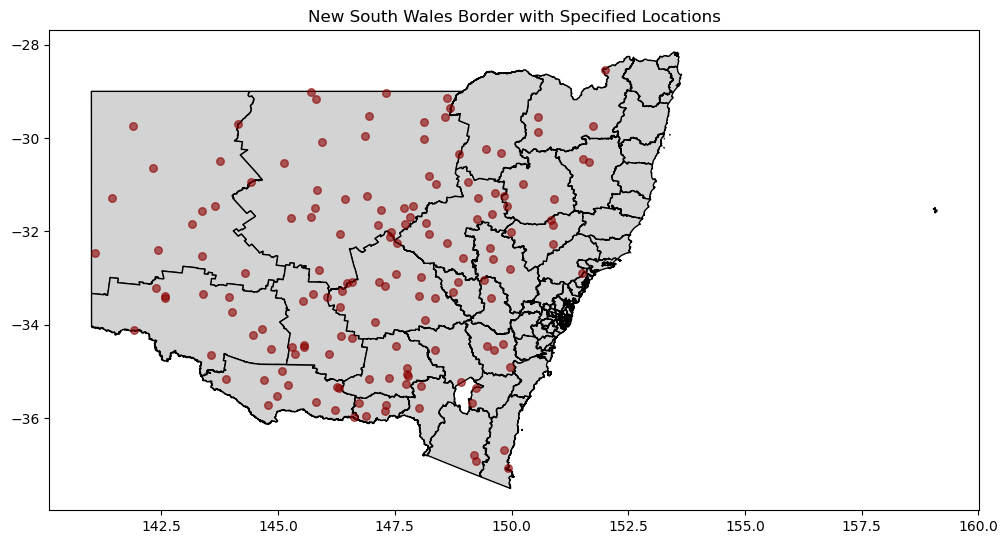

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import mplcursors

# Load New South Wales border from the GeoJSON file
nsw_border_gdf = gpd.read_file(r'C:\Users\manda\Downloads\NSW_SA3 (1).json')

# Convert the locations dictionary to a DataFrame
df = pd.DataFrame(list(locations.values()), index=locations.keys(), columns=['Latitude', 'Longitude'])

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the NSW border
nsw_border_gdf.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the points
gdf.plot(ax=ax, color='darkred', marker='o', markersize=30, alpha=0.6)

# Add labels
mplcursors.cursor(hover=True).connect(
    "add", 
    lambda sel: sel.annotation.set_text(gdf.index[sel.target.index])
)

# Set plot title
ax.set_title('New South Wales Border with Specified Locations')

# Show plot
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


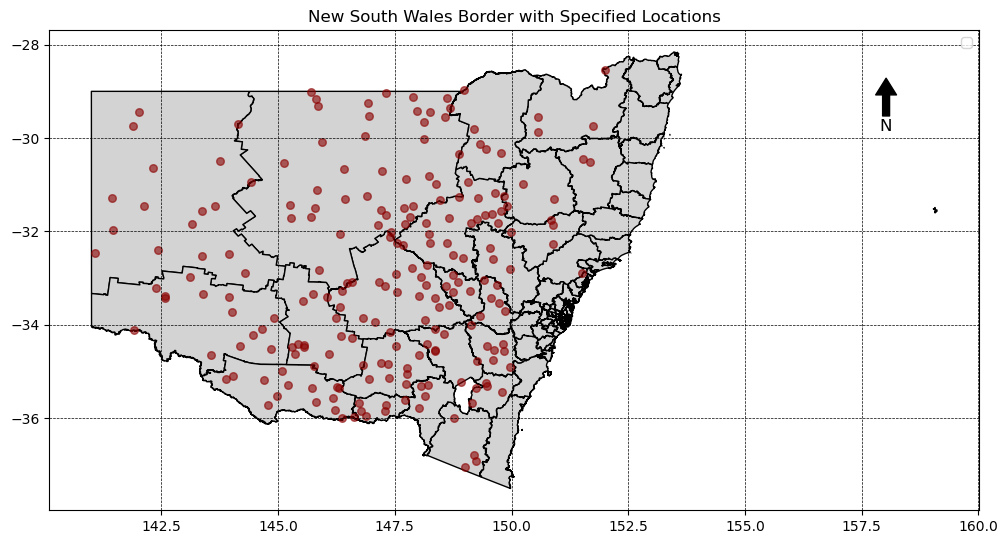

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors

# Path to the Excel file
excel_path = r'C:\Users\manda\Documents\Master thesis Data\\New Stations data\locations.xlsx'

# Load New South Wales border from the GeoJSON file
nsw_border_gdf = gpd.read_file(r'C:\Users\manda\Downloads\NSW_SA3 (1).json')

# Load the locations from the Excel file
# Assuming the Excel has columns 'Name', 'Latitude', 'Longitude'
locations_df = pd.read_excel(excel_path)
locations_df.set_index('Location', inplace=True)

# Convert DataFrame to GeoDataFrame
locations_gdf = gpd.GeoDataFrame(locations_df, geometry=gpd.points_from_xy(locations_df.Longitude, locations_df.Latitude))

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the NSW border
nsw_border_gdf.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the points from locations_gdf
locations_gdf.plot(ax=ax, color='darkred', marker='o', markersize=30, alpha=0.6)

# Add labels using mplcursors for interactivity
mplcursors.cursor(hover=True).connect(
    "add", 
    lambda sel: sel.annotation.set_text(locations_gdf.index[sel.target.index])
)

ax.grid(True, color='black', linestyle='--', linewidth=0.5)

# Add a legend
ax.legend()

# Add a north arrow
x, y, arrow_length = 0.9, 0.9, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=12, xycoords=ax.transAxes)
# Set plot title
ax.set_title('New South Wales Border with Specified Locations')

# Show plot
plt.show()


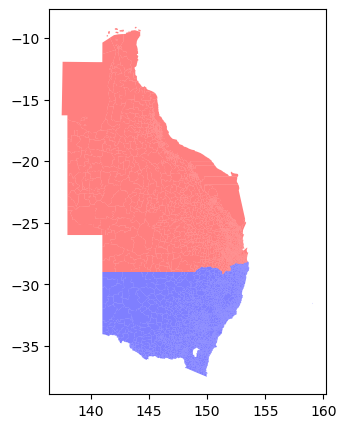

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to your GeoJSON files
geojson_file1 = r'C:\Users\manda\Downloads\suburb-10-nsw.geojson'
geojson_file2 = r'C:\Users\manda\Downloads\suburb-10-qld.geojson'

# Read the GeoJSON files
gdf1 = gpd.read_file(geojson_file1)
gdf2 = gpd.read_file(geojson_file2)

# Plot the first GeoJSON
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
gdf1.plot(ax=plt.gca(), color='blue', alpha=0.5)

# Plot the second GeoJSON
gdf2.plot(ax=plt.gca(), color='red', alpha=0.5)

# Show the plot
plt.show()


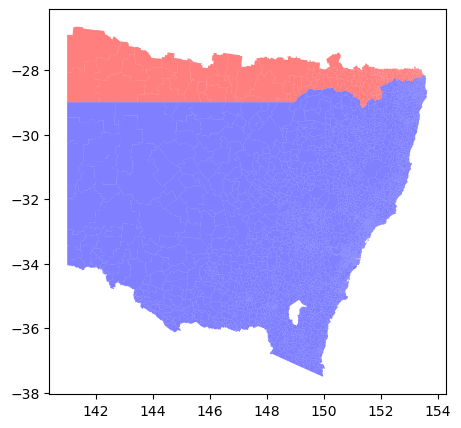

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to your GeoJSON files
geojson_file1 = r'C:\Users\manda\Downloads\suburb-10-nsw.geojson'
geojson_file2 = r'C:\Users\manda\Downloads\suburb-10-qld.geojson'

# Read the GeoJSON files
gdf1 = gpd.read_file(geojson_file1)
gdf2 = gpd.read_file(geojson_file2)

# Filter GeoDataFrames based on latitude and longitude range
gdf1_filtered = gdf1.cx[140:154, -38:-28]
gdf2_filtered = gdf2.cx[140:154, -38:-28]

# Plot the first GeoJSON
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
gdf1_filtered.plot(ax=plt.gca(), color='blue', alpha=0.5)

# Plot the second GeoJSON
gdf2_filtered.plot(ax=plt.gca(), color='red', alpha=0.5)

# Show the plot
plt.show()



C:\Users\manda\AppData\Local\Temp\ipykernel_16612\2773648285.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  station_df['Lat'] = station_df['Lat'].astype(str).str.replace(r'[^\d.-]', '').astype(float)
C:\Users\manda\AppData\Local\Temp\ipykernel_16612\2773648285.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  station_df['Lon'] = station_df['Lon'].astype(str).str.replace(r'[^\d.-]', '').astype(float)


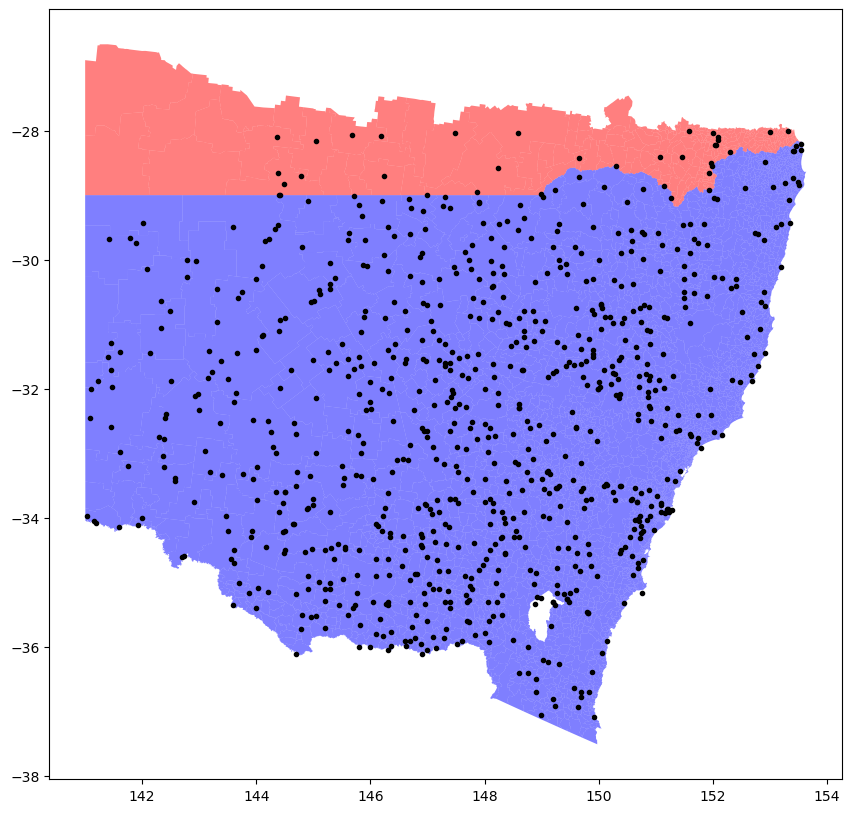

In [27]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to your Excel file containing station data
excel_file = r'C:\Users\manda\Documents\Master thesis Data\BoM 2 Station list.xlsx'

# Read the Excel file
station_df = pd.read_excel(excel_file)

# Clean latitude and longitude columns
station_df['Lat'] = station_df['Lat'].astype(str).str.replace(r'[^\d.-]', '').astype(float)
station_df['Lon'] = station_df['Lon'].astype(str).str.replace(r'[^\d.-]', '').astype(float)

# Extract latitude and longitude columns from the DataFrame
latitudes = station_df['Lat']
longitudes = station_df['Lon']

# Plot the GeoJSON files within the specified latitude and longitude range
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
gdf1_filtered.plot(ax=plt.gca(), color='blue', alpha=0.5)
gdf2_filtered.plot(ax=plt.gca(), color='red', alpha=0.5)

# Plot the stations as points
plt.scatter(longitudes, latitudes, color='black', marker='.')

# Show the plot
plt.show()
